## Imports

In [57]:
import numpy as np 
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


1. Read Data

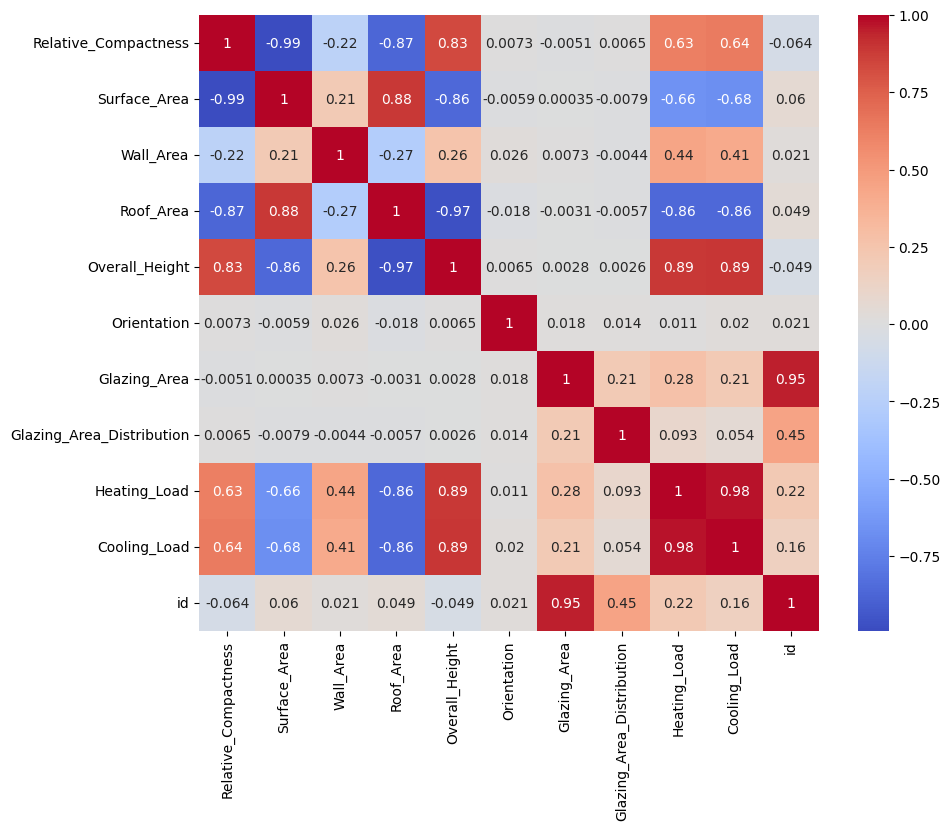

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       576 non-null    float64
 1   Surface_Area               576 non-null    float64
 2   Wall_Area                  576 non-null    float64
 3   Roof_Area                  576 non-null    float64
 4   Overall_Height             576 non-null    float64
 5   Orientation                576 non-null    int64  
 6   Glazing_Area               576 non-null    float64
 7   Glazing_Area_Distribution  576 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 36.1 KB


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.761875,673.664931,318.287326,177.688802,5.219618,3.515625,0.236545,2.829861
std,0.105511,88.199959,42.972513,44.839407,1.751257,1.106392,0.133600,1.549938
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,3.000000,0.100000,2.000000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [58]:
df = pd.read_csv("dataset.csv")
x_df = df.drop(columns=["id","Heating_Load","Cooling_Load" ])
y_df = df[["Heating_Load", "Cooling_Load"]]
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
x_df.info()
x_df.describe()

In [59]:
y_df.info()
y_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heating_Load  576 non-null    float64
 1   Cooling_Load  576 non-null    float64
dtypes: float64(2)
memory usage: 9.1 KB


,Heating_Load,Cooling_Load
count,576.000000,576.000000
mean,22.101875,24.352257
std,10.027059,9.451193
min,6.010000,10.900000
25%,12.970000,15.585000
50%,18.175000,21.395000
75%,30.012500,32.830000
max,43.100000,48.030000


In [60]:
scalerx = StandardScaler()
scalery = StandardScaler()
x_scaled = scalerx.fit_transform(x_df)
# x_scaled = np.tile(x_scaled, (50, 1))
X = pd.DataFrame(x_scaled, columns=x_df.columns)
y_scaled = scalery.fit_transform(y_df)
# y_scaled = np.tile(y_scaled, (50, 1))
Y = pd.DataFrame(y_scaled, columns=y_df.columns)

In [61]:
X.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,2.467162e-16,1.511137e-16,-5.751572e-16,-2.467162e-16,1.341519e-16,3.083953e-17,4.934325e-17,-9.868649e-17
std,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00
min,-1.345821e+00,-1.806160e+00,-1.706929e+00,-1.505315e+00,-9.827870e-01,-1.371071e+00,-1.772080e+00,-1.827377e+00
25%,-9.663824e-01,-6.940830e-01,-5.656741e-01,-6.850108e-01,-9.827870e-01,-4.664470e-01,-1.022929e+00,-5.358812e-01
50%,-2.075054e-01,1.399750e-01,4.953363e-03,9.555971e-01,-9.827870e-01,-4.664470e-01,1.007972e-01,1.098669e-01
75%,5.513716e-01,9.740331e-01,5.755808e-01,9.555971e-01,1.017514e+00,1.342802e+00,1.224524e+00,7.556149e-01
max,2.069126e+00,1.530072e+00,2.287463e+00,9.555971e-01,1.017514e+00,1.342802e+00,1.224524e+00,1.401363e+00


In [62]:
Y.describe()

,Heating_Load,Cooling_Load
count,5.760000e+02,5.760000e+02
mean,6.167906e-17,-8.635068e-17
std,1.000869e+00,1.000869e+00
min,-1.606240e+00,-1.424577e+00
25%,-9.115148e-01,-9.284413e-01
50%,-3.919682e-01,-3.131697e-01
75%,7.896135e-01,8.977821e-01
max,2.095966e+00,2.507443e+00


In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

Testing multiple hyperparams

n_estimators: 50, F1 Score: 0.07655913382768631
n_estimators: 100, F1 Score: 0.07193043828010559
n_estimators: 150, F1 Score: 0.07152801752090454
n_estimators: 200, F1 Score: 0.07152801752090454
n_estimators: 250, F1 Score: 0.07152801752090454
n_estimators: 300, F1 Score: 0.07152801752090454
n_estimators: 350, F1 Score: 0.07152801007032394
n_estimators: 400, F1 Score: 0.07152801007032394
n_estimators: 450, F1 Score: 0.07152801007032394
n_estimators: 500, F1 Score: 0.07152801007032394


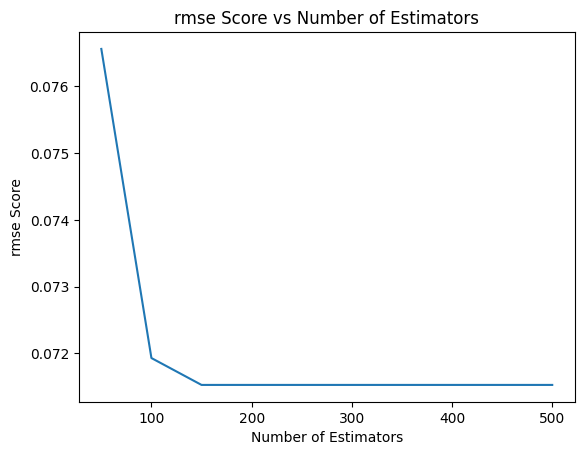

Best n_estimators: 350


In [64]:
n_estimatorsList = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
rmse_scores =  []
for n_estimators in n_estimatorsList:
    model = XGBRegressor(n_estimators=n_estimators,eval_metric=root_mean_squared_error,random_state=42 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmse_scores.append(rmse)
    print(f"n_estimators: {n_estimators}, F1 Score: {rmse}")
    
plt.plot(n_estimatorsList, rmse_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('rmse Score')
plt.title('rmse Score vs Number of Estimators')
plt.show()
best_n_estimators_index = rmse_scores.index(min(rmse_scores))
best_n_estimators = n_estimatorsList[best_n_estimators_index]
print(f"Best n_estimators: {best_n_estimators}")

n_estimators: 0.01, F1 Score: 0.39390191435813904
n_estimators: 0.05, F1 Score: 0.11325787752866745
n_estimators: 0.1, F1 Score: 0.08974431455135345
n_estimators: 0.2, F1 Score: 0.07553381472826004
n_estimators: 0.3, F1 Score: 0.07193043828010559
n_estimators: 0.4, F1 Score: 0.08001642674207687
n_estimators: 0.5, F1 Score: 0.07095792144536972


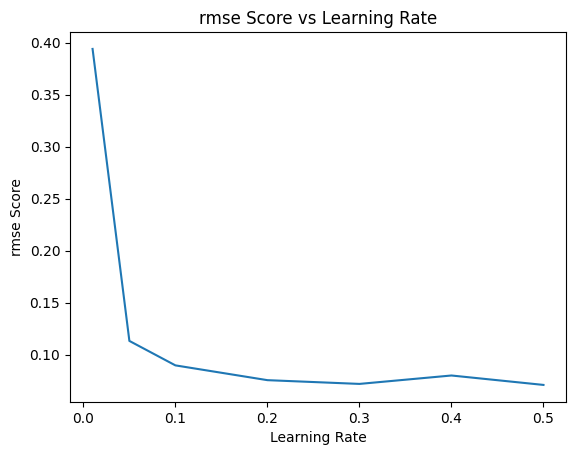

Best n_estimators: 0.5


In [65]:
learning_rateList = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
rmse_scores =  []
for learning_rate in learning_rateList:
    model = XGBRegressor(learning_rate=learning_rate,eval_metric=root_mean_squared_error,random_state=42 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmse_scores.append(rmse)
    print(f"n_estimators: {learning_rate}, F1 Score: {rmse}")
    
plt.plot(learning_rateList, rmse_scores)
plt.xlabel('Learning Rate')
plt.ylabel('rmse Score')
plt.title('rmse Score vs Learning Rate')
plt.show()
best_learning_rate_index = rmse_scores.index(min(rmse_scores))
best_learning_rate = learning_rateList[best_learning_rate_index]
print(f"Best n_estimators: {best_learning_rate}")

c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 0.5, F1 Score: 0.07193043828010559


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 0.6, F1 Score: 0.07193043828010559


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 0.7, F1 Score: 0.07193043828010559


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 0.8, F1 Score: 0.07193043828010559


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 0.9, F1 Score: 0.07193043828010559


c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


sub sample: 1.0, F1 Score: 0.07193043828010559


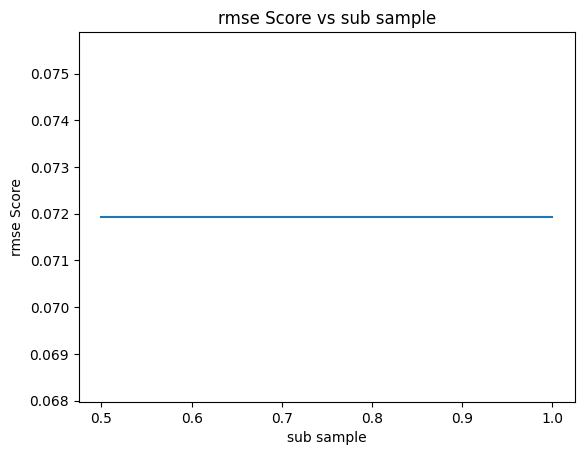

Best n_estimators: 0.01


In [66]:
sub_sampleList = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
rmse_scores =  []
for sub_sample in sub_sampleList:
    model = XGBRegressor(sub_sample=sub_sample,eval_metric=root_mean_squared_error,random_state=42 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    rmse_scores.append(rmse)
    print(f"sub sample: {sub_sample}, F1 Score: {rmse}")
    
plt.plot(sub_sampleList, rmse_scores)
plt.xlabel('sub sample')
plt.ylabel('rmse Score')
plt.title('rmse Score vs sub sample')
plt.show()
best_sub_sample_index = rmse_scores.index(min(rmse_scores))
best_sub_sample = learning_rateList[best_sub_sample_index]
print(f"Best n_estimators: {best_sub_sample}")

Finale model

In [67]:
model = XGBRegressor(n_estimators = best_n_estimators , learning_rate = best_learning_rate , sub_sample = best_sub_sample , eval_metric=root_mean_squared_error,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
print(f"RMSE score = {rmse}")

c:\Users\amaTek\Desktop\Machine Learning\soai\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RMSE score = 0.07095791399478912


Read eval data

In [68]:
eval_df = pd.read_csv("evaluation_set.csv")
x_eval_df = eval_df.drop(columns=["id"])
x_eval_df["Overall_Height"] = x_eval_df["Overall_Height"] / 100
x_eval_df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.771042,665.838542,319.138021,173.350260,5.341146,3.453125,0.227865,2.760417
std,0.106555,87.710838,45.641879,46.096984,1.752194,1.156765,0.132207,1.556912
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.690000,588.000000,294.000000,122.500000,3.500000,2.000000,0.100000,1.000000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [69]:
x_eval_scaled = scalerx.transform(x_eval_df)
X_eval = pd.DataFrame(x_eval_scaled, columns=x_df.columns)
X_eval.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.086955,-0.088812,0.019813,-0.096841,0.069455,-0.056539,-0.065030,-0.044844
std,1.010773,0.995319,1.063041,1.028940,1.001405,1.046438,0.990429,1.005373
min,-1.345821,-1.806160,-1.706929,-1.505315,-0.982787,-1.371071,-1.772080,-1.827377
25%,-0.681804,-0.972102,-0.565674,-1.231880,-0.982787,-1.371071,-1.022929,-1.181629
50%,-0.017786,-0.138044,0.004953,-0.685011,1.017514,0.438177,0.100797,0.109867
75%,0.930810,0.696014,0.575581,0.955597,1.017514,0.438177,1.224524,0.755615
max,2.069126,1.530072,2.287463,0.955597,1.017514,1.342802,1.224524,1.401363


In [70]:
Y_eval_pred = model.predict(X_eval)
Y_eval_pred = pd.DataFrame(Y_eval_pred, columns=y_df.columns)
Y_eval_pred.describe()


,Heating_Load,Cooling_Load
count,192.000000,192.000000
mean,0.082505,0.104142
std,1.022105,1.025142
min,-1.576066,-1.357834
25%,-0.893770,-0.924824
50%,0.127323,0.141120
75%,1.037889,1.054886
max,2.027687,2.443151


In [71]:
Y_eval_rescaled = scalery.inverse_transform(Y_eval_pred)
Y_eval_rescaled = pd.DataFrame(Y_eval_rescaled,columns=y_df.columns)
Y_eval_rescaled.describe()

,Heating_Load,Cooling_Load
count,192.000000,192.000000
mean,22.928442,25.335672
std,10.239806,9.680399
min,6.312296,11.530255
25%,13.147773,15.619160
50%,23.377442,25.684854
75%,32.499805,34.313534
max,42.415955,47.422897


In [72]:
Y_eval_rescaled.head()

,Heating_Load,Cooling_Load
0,15.405701,17.046837
1,13.230680,15.978471
2,32.250957,33.730171
3,41.235210,47.422897
4,17.037113,19.973911


In [73]:
Y_eval_rescaled.insert(0, 'id', eval_df['id'])
Y_eval_rescaled.to_csv('evaluation_predictions_trees.csv', index=False)